In [1]:
def reproduceResult():
  seed_value= 0

  
  with tf.device("/gpu:0"):
    ...


  os.environ['PYTHONHASHSEED']=str(seed_value)
  np.random.seed(0)
  rn.seed(0)


  session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, 
                                          inter_op_parallelism_threads=1)


  tf.compat.v1.set_random_seed(seed_value)
  sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
  tf.compat.v1.keras.backend.set_session(sess)
  tf.compat.v1.keras.backend.clear_session()

  


In [2]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
  
import os 
import numpy as np
import tensorflow as tf
import random as rn
from tensorflow import keras

reproduceResult()
# %tensorflow_version 2.x
# import tensorflow as tf
# tf.test.gpu_device_name()
# from scipy import integrate
# import os
# import numpy as np
# from tensorflow import keras
import tempfile
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
# import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import backend as K


from tensorflow.keras import callbacks

from keras_lr_finder import LRFinder
from clr.clr_callback import CyclicLR

import tensorflow_model_optimization as tfmot

import tqdm

import keras_tuner
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from attention import Attention

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math


from keras.preprocessing.text import Tokenizer


import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import PorterStemmer
from sklearn import preprocessing

from bnlp import SentencepieceTokenizer
import gensim
import fasttext 

C:\Users\moshi\AppData\Local\Temp\ipykernel_21952\2832172220.py:43: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [3]:
df_train = pd.read_csv('F:/Context_Aware_Data_Cleaning_Deep/SENTNOB/Dataset/sentnob_train.csv')
df_test = pd.read_csv('F:/Context_Aware_Data_Cleaning_Deep/SENTNOB/Dataset/sentnob_val.csv')

In [4]:
df_train.head

<bound method NDFrame.head of                                                     Data  Label
0      মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোম...      1
1      এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তায়...      2
2                              ভাই আপনার কথাই যাদু রয়েছে      1
3                            উওরটা আমার অনেক ভাল লেগেছে       1
4      আমার নিজের গাড়ী নিয়ে কি সাজেক যেতে পারবো না ?...      0
...                                                  ...    ...
12570  বর্ডারে অনেক লেট হয়ে যাওয়াতে আমরা জিপে করে চলে...      1
12571  আমার সোনার বাংলাতে এমন রক্ষক নামের ভক্ষকের কোন...      2
12572  ওনারা এত হাইজিনিক ও এত সুন্দর পরিবেশে রান্না ক...      1
12573  বাংলাদেশ আমরা পুলিশ চাই না এই ধরনে পুলিশ দরকার...      2
12574         বসুন্ধরা শাখার হাজি বিরিয়ানি একবারেই ফালতু      2

[12575 rows x 2 columns]>

In [5]:
df_train.isnull()

,Data,Label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
12570,False,False
12571,False,False
12572,False,False
12573,False,False


In [6]:
df_train.dropna(inplace=True)

In [7]:
df_train.groupby("Label").describe()

Data                                                               
      count unique                                                top freq
Label                                                                     
0      2894   2809  প্রেমেণ্ট ভিসা নিশ্চিত হওয়ার পরে , অগ্রীম কোনো...    3
1      5133   4986  আমি কাউকে শুধু ধন্যবাদ দিতে চাই না , এতটুকু বল...    3
2      4548   4350  কুত্তারবাচ্ছা , তোর জন্মই ত পতিতালয়ে । তা না হ...    3

In [8]:
df_train["Label"].value_counts()

1    5133
2    4548
0    2894
Name: Label, dtype: int64

In [9]:
from bnlp import NLTKTokenizer
from bs4 import BeautifulSoup
from bnlp import BengaliCorpus as corpus
import re
from bangla_stemmer.stemmer import stemmer

In [10]:
df_train['Data'] = df_train['Data'].astype(str)

In [11]:
def rem_symbol_punct(text):
    pattern = re.compile('[!@#$%^&*()_+-={}\[\];:\'\"\|<>,.///?`~।]', flags=re.I)
    return pattern.sub(r'', text)


def remove_html_and_urls(text):
    # Remove HTML tags
    soup = BeautifulSoup(text, "html.parser")
    text_without_html = soup.get_text()

    # Remove URLs
    text_without_urls = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text_without_html)

    return text_without_urls


def remove_emojis(text):
    # Emoji patterns for different Unicode ranges
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # Emoticons
        "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
        "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
        "\U0001F700-\U0001F77F"  # Alphanumeric Supplement
        "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        "\U0001FA00-\U0001FA6F"  # Chess Symbols
        "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        "\U00002702-\U000027B0"  # Dingbat symbols
        "\U000024C2-\U0001F251" 
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r'', text)


#remove noise
def Remove_text(text):
    text = rem_symbol_punct(text)
    text = remove_html_and_urls(text)
    text = remove_emojis(text)
    return text

In [12]:
df_train['Data'] = df_train['Data'].apply(Remove_text)
df_test['Data'] = df_test['Data'].apply(Remove_text)

In [13]:
# Instantiate the NLTKTokenizer
bnltk = NLTKTokenizer()


def remove_stopwords(text):
    # Get the list of Bengali stopwords
    bengali_stopwords = corpus.stopwords
    
    # Tokenize the Bengali text using NLTKTokenizer
    word_tokens = bnltk.word_tokenize(text)
    
    # Remove stopwords
    filtered_tokens = [token for token in word_tokens if token not in bengali_stopwords]
    
    # Join the filtered tokens back into a text
    filtered_text = ' '.join(filtered_tokens)
    
    return filtered_text

In [14]:
df_train['Data'] = df_train['Data'].apply(remove_stopwords)
df_test['Data'] = df_test['Data'].apply(remove_stopwords)

In [15]:
longest_string = max(df_train["Data"], key=len)
print(len(longest_string))

266


In [16]:
def apply_bangla_stemming(text):
    stmr = stemmer.BanglaStemmer()
    word_tokens = bnltk.word_tokenize(text)
    stemmed_words = [stmr.stem(word) for word in word_tokens]
    return ' '.join(stemmed_words)

In [17]:
df_train['Data'] = df_train['Data'].apply(apply_bangla_stemming)
df_test['Data'] = df_test['Data'].apply(apply_bangla_stemming)

applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..

In [18]:
longest_string = max(df_train["Data"], key=len)
print(len(longest_string))

246


In [19]:
# train, test = train_test_split(df, test_size=0.2, stratify = df["classes"], random_state = 42)
num_classes = 3
embed_num_dims = 300
max_seq_len = 50

x_train = df_train['Data']
x_test = df_test['Data']

y_train = df_train['Label']
y_test = df_test['Label']

texts_train = x_train
texts_test = x_test

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train['Data'])

sequence_train = tokenizer.texts_to_sequences(texts_train)
sequence_test = tokenizer.texts_to_sequences(texts_test)

index_of_words = tokenizer.word_index

vocab_size = len(index_of_words) + 1

print('Number of unique words: {}'.format(len(index_of_words)))

X_train_pad = pad_sequences(sequence_train, maxlen = max_seq_len, padding='pre' )
X_test_pad = pad_sequences(sequence_test, maxlen = max_seq_len,  padding='pre')

print(X_train_pad)

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


Number of unique words: 19595
[[   0    0    0 ... 3019  985 5849]
 [   0    0    0 ...   64 5851   51]
 [   0    0    0 ...    8 9577 1094]
 ...
 [   0    0    0 ... 3241 1803  296]
 [   0    0    0 ... 6378    4   51]
 [   0    0    0 ...  114 1488  293]]


In [20]:
# META EMBADDING

In [21]:
def create_embedding_matrix(word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    with open('F:/Python_code/embedding/glove.840B.300d.txt', encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                try:
                    idx = word_index[word]
                    embedding_matrix[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]
                except ValueError:
                    pass
    return embedding_matrix

embedd_matrix_glove = create_embedding_matrix(index_of_words, embed_num_dims)
print(embedd_matrix_glove.shape)

(19596, 300)


# Random Search

In [22]:
from tensorflow.keras import regularizers
import time
LOG_DIR = f"{int(time.time())}"
seed_value= 0



def build_model(hp):
  
  reproduceResult()

  print('Ya it comes here')
  fake_val = hp.Int("cnn_1_unit",min_value =16, max_value = 96, step = 16)
  cnn_1_unit = hp.Int("cnn_1_unit",min_value =16, max_value = 96, step = 16)
  cnn_1_dropout = hp.Float("cnn_1_dropout",min_value = 0.1,max_value = 0.3,step = 0.1)

  lstm_unit = hp.Int("lstm_unit",min_value =64, max_value = 256, step = 32)
  lstm_dropout = hp.Float("lstm_dropout",min_value = 0.1,max_value = 0.5,step = 0.1)




  seq_input = keras.layers.Input(shape=(max_seq_len,))

  embedded = keras.layers.Embedding(vocab_size,
                          embed_num_dims,
                          input_length = max_seq_len,
                          weights = [embedd_matrix_glove])(seq_input)

  cnn = keras.layers.Conv1D(cnn_1_unit,3,kernel_regularizer=regularizers.l2(1e-4),
                            bias_regularizer=regularizers.l2(1e-2),
                            activity_regularizer=regularizers.l2(1e-4))(embedded)
  cnn = keras.layers.Activation(activation='relu')(cnn)
  cnn = keras.layers.BatchNormalization()(cnn)
  cnn = keras.layers.Dropout(cnn_1_dropout,seed=seed_value)(cnn)

  max_pooling = keras.layers.GlobalMaxPooling1D()(cnn)
  output = keras.layers.Dense(num_classes, activation='softmax')(max_pooling)

  model = keras.Model(inputs = [seq_input], outputs = output)
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

  return model


stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                              patience=5,
                              restore_best_weights=True,
                              verbose=0, mode='max')


clr_step_size = int((len(X_train_pad)/64))
base_lr = 1e-3
max_lr = 6e-3
mode = 'exp_range'


clr = CyclicLR(base_lr = base_lr, max_lr = max_lr, step_size = clr_step_size, mode = mode)



tuner = RandomSearch(
    build_model,
    objective = keras_tuner.Objective('val_accuracy', direction="max"),
    max_trials = 30,
    executions_per_trial = 1,
    directory = LOG_DIR
    )
  
tuner.search(x=X_train_pad,y = y_train,epochs = 30, batch_size = 64,callbacks = [stop,clr], 
             validation_data = (X_test_pad,y_test))


tuner.results_summary()

Trial 30 Complete [00h 00m 17s]
val_accuracy: 0.6834716200828552

Best val_accuracy So Far: 0.6994256377220154
Total elapsed time: 00h 10m 22s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in 1708633690\untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 10 summary
Hyperparameters:
cnn_1_unit: 48
cnn_1_dropout: 0.2
lstm_unit: 224
lstm_dropout: 0.2
Score: 0.6994256377220154

Trial 02 summary
Hyperparameters:
cnn_1_unit: 96
cnn_1_dropout: 0.2
lstm_unit: 128
lstm_dropout: 0.2
Score: 0.6975111961364746

Trial 24 summary
Hyperparameters:
cnn_1_unit: 48
cnn_1_dropout: 0.1
lstm_unit: 192
lstm_dropout: 0.30000000000000004
Score: 0.6975111961364746

Trial 12 summary
Hyperparameters:
cnn_1_unit: 32
cnn_1_dropout: 0.2
lstm_unit: 256
lstm_dropout: 0.5
Score: 0.6962348222732544

Trial 06 summary
Hyperparameters:
cnn_1_unit: 64
cnn_1_dropout: 0.1
lstm_unit: 160
lstm_dropout: 0.5
Score: 0.6955966949462891

Trial 26 summary
Hyperparameters:
cn

In [23]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
cnn_1_unit (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 96, 'step': 16, 'sampling': 'linear'}
cnn_1_dropout (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.3, 'step': 0.1, 'sampling': 'linear'}
lstm_unit (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
lstm_dropout (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}


In [24]:
#get best hypoerparamter
best_hps = tuner.get_best_hyperparameters()[0]
model = build_model(best_hps)

Ya it comes here


In [25]:
history = model.fit(x=X_train_pad,y = y_train,epochs = 30, batch_size = 64,callbacks = [stop,clr], 
             validation_data = (X_test_pad,y_test))

Epoch 1/30
197/197 [==============================] - 2s 8ms/step - loss: 0.9566 - accuracy: 0.5872 - val_loss: 1.1277 - val_accuracy: 0.4295
Epoch 2/30
197/197 [==============================] - 2s 8ms/step - loss: 0.5144 - accuracy: 0.8115 - val_loss: 0.8170 - val_accuracy: 0.6720
Epoch 3/30
197/197 [==============================] - 2s 8ms/step - loss: 0.2476 - accuracy: 0.9337 - val_loss: 0.9098 - val_accuracy: 0.6496
Epoch 4/30
197/197 [==============================] - 2s 8ms/step - loss: 0.2780 - accuracy: 0.9297 - val_loss: 0.9715 - val_accuracy: 0.6873
Epoch 5/30
197/197 [==============================] - 2s 8ms/step - loss: 0.1669 - accuracy: 0.9673 - val_loss: 1.0918 - val_accuracy: 0.6745
Epoch 6/30
197/197 [==============================] - 2s 8ms/step - loss: 0.1985 - accuracy: 0.9607 - val_loss: 1.0549 - val_accuracy: 0.6847
Epoch 7/30
197/197 [==============================] - 2s 8ms/step - loss: 0.1520 - accuracy: 0.9724 - val_loss: 1.0503 - val_accuracy: 0.6873
Epoch 

In [26]:
def PlotGraph(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'g', label='Training acc')
    plt.plot(x, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'g', label='Training loss')
    plt.plot(x, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

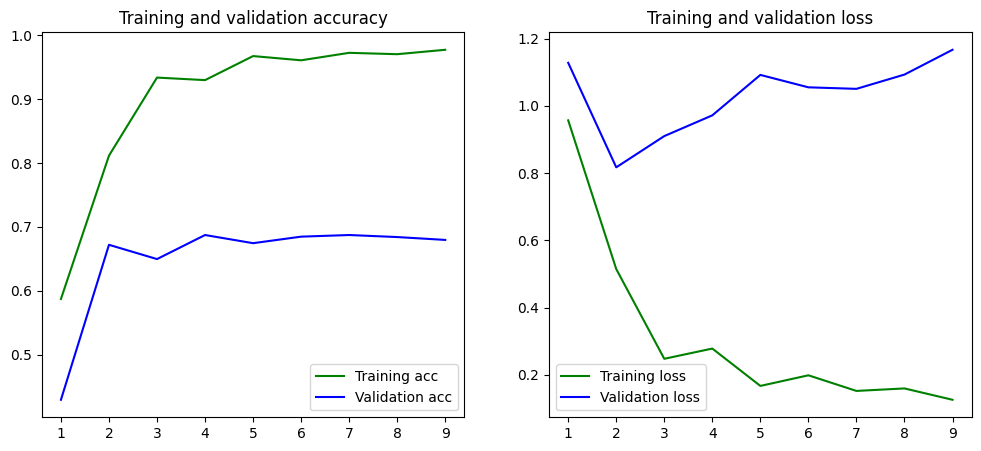

In [27]:
PlotGraph(history)

In [28]:
predict = model.predict(X_test_pad)
predict_class = np.argmax(predict, axis=1)
predict_class = np.array(predict_class)
predict_class

49/49 [==============================] - 0s 1ms/step


array([1, 1, 1, ..., 2, 2, 0], dtype=int64)

In [29]:
predict_lables=np.argmax(y_test, axis=1)
predict_lables

array([1, 2, 1, ..., 1, 2, 0], dtype=int64)

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predict_lables, predict_class)
cm

array([[163, 121,  70],
       [ 94, 482,  47],
       [ 68,  90, 432]], dtype=int64)

In [31]:
encoding = {
    0: "Neutral",
    1: "Positive",
    2: "Negative"
}

In [32]:
class_names = list(encoding.values())

In [33]:
print(class_names)

['Neutral', 'Positive', 'Negative']


<Axes: >

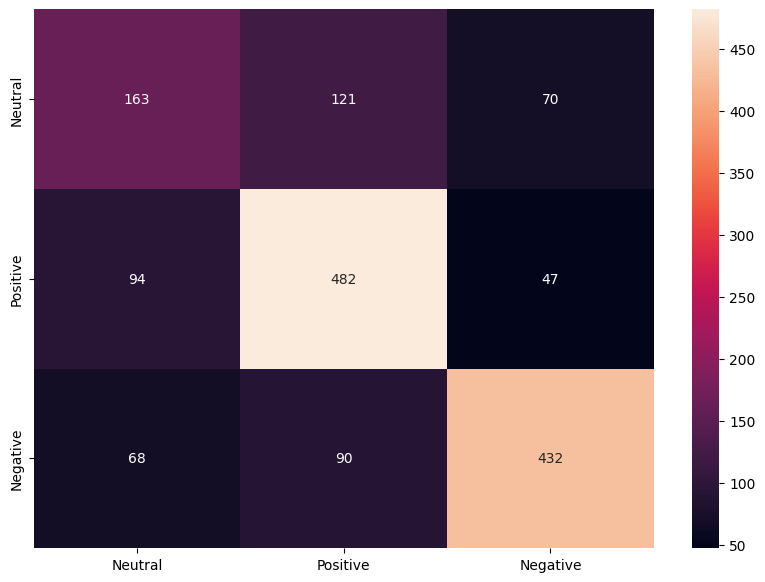

In [34]:
df_cm = pd.DataFrame(cm, index=class_names,columns=class_names)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm,annot=True, fmt ="d")

In [35]:
from sklearn.metrics import classification_report
print(classification_report(predict_lables, predict_class, target_names =class_names))

              precision    recall  f1-score   support

     Neutral       0.50      0.46      0.48       354
    Positive       0.70      0.77      0.73       623
    Negative       0.79      0.73      0.76       590

    accuracy                           0.69      1567
   macro avg       0.66      0.66      0.66      1567
weighted avg       0.69      0.69      0.69      1567

